In [2]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def creat_cnn(kernel_size):
    inputs = tf.keras.Input((None,None, 1)) #未指定model數量
    outputs = Conv2D(1,kernel_size, (1,1), padding='same', name='conv1')(inputs)

    filter_net = tf.keras.Model(inputs=inputs , outputs=outputs)  #告訴這個model input和output是甚麼
    weights=np.zeros((kernel_size,kernel_size,1,1))
    weights.fill(1/(kernel_size**2))
    
    bias=np.array([0])
    filter_net.get_layer('conv1').set_weights([weights, bias])
    filter_net.summary()
    return filter_net

In [4]:
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
img_batch=np.expand_dims(img,axis=0)

In [ ]:
filter_net5=creat_cnn(5)
filter_net3=creat_cnn(3)
filter_net11=creat_cnn(11)
def plot_picture(filter_net,img_batch,name):
    img_out = filter_net(img_batch)
    img_out=np.array(img_out)
    img_out=img_out.reshape((772,564)).astype(np.uint8)
    plt.imshow(img,cmap='gray')
    plt.title(name)
    plt.show()

plt.imshow(img,cmap = 'gray')
plt.title('origin')
plt.show()
plot_picture(filter_net5,img_batch,'5*5')
plot_picture(filter_net3,img_batch,'3*3')
plot_picture(filter_net11,img_batch,'11*11')

Model: "pad_filter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
pad_conv1 (Conv2D)           (None, None, None, 1)     26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


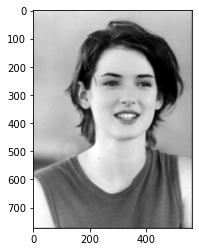

In [14]:
kernel_size=5

pad =int ((kernel_size-1)/2)
img_pad =np.zeros((772+2*pad,564+2*pad))
img_pad.shape
img_pad[2:774,2:566]=img

pad_inputs = tf.keras.Input((None, None, 1))
pad_outputs = Conv2D(1,5, (1,1),padding ='valid', name='pad_conv1')(pad_inputs)
pad_filter = tf.keras.Model(inputs=pad_inputs,outputs=pad_outputs,name='pad_filter')
pad_bias=np.array([0])
pad_weights=np.zeros((5,5,1,1))
pad_weights.fill(1/25)
pad_filter.get_layer('pad_conv1').set_weights([pad_weights,pad_bias])
pad_filter.summary()

img_batch=np.expand_dims(img_pad,axis=0)
img_out=pad_filter(img_batch)
img_out=np.array(img_out)
img_out.shape
img_out=img_out.reshape((772,564)).astype(np.uint8)
plt.imshow(img_out, cmap='gray')
plt.show()


In [15]:
a=np.array([[1,2,3],
          [4,5,6]])
print(a)
print(a.shape)
print()

[[1 2 3]
 [4 5 6]]
(2, 3)

